In [1]:
import numpy as np
import pandas as pd

In [2]:
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한
# pd.set_option('precision', 3)     # 왜 오류?

'%.3f'

In [3]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [4]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [5]:
# 데이터 파일이 필요하다...
# 지금 보고 있는 책은 해당 사항이 없는 데이터 였다.
# 즉, 강의 자료랑 책은 다르다

In [6]:
# 머신러닝에서 분산의 의미는 꽤나 중요한 편인데 그렇게 넘어가면 나중에
# 곤란한데... 데이터의 분포를 나타내는 유일한 수단이 분산이었을건데...
# 바이어스는 분산이 아니라 편향을 의미

In [7]:
# 분산은 꽤나 많이 중요하다/ 데이터 분석에서는...

# 표준편차는 분산의 지표로 사용할 수 있기 때문에?
# 평균으로부터 떨어진 거리를 나타내기에 시그마 거리

In [8]:
# 역시 학문적이로 조용히 이야기하는게 잠을 깨우는데 도움이 되는 군

In [9]:
# 범위와 사분위수
# 사분의수 범위는 IQR = Q3(제3분위수, 75%) - Q1(제1분위수, 25%)
# Q2(제2분위수, 50%), 0%과 100%는 min과 max
# 이들의 기준은 평균, Q2

In [10]:
# 데이터의 정규화,표준화
# 일반적인 표준화는 z, 정규분포(N(0,1))로 만들어줌
# 편찻값은 평균이 m, 표준편차가 n이 되도록 정규화 한 값
# 굳이 편차를 주면서 정규화. 표준화 할 필요가 있을까?
# 편차값을 주는 이유? (나중에 따로 찾아보기)

In [11]:
# 도수분포표
# 연속형변수를 표현하는 방법중 하나
# 계급(범위)을 가지고 있고 도수는 계급별 수(count)
# 계급폭 == 범위
# 상대도수 : 전체 데이터에 대해서 해당 게급의 데이터가 차지하는 비울

In [12]:
# 누적 상대도수: 도수를 누적해서 더함. 합은 1

In [13]:
# 히스토그램 : 도수분포표의 시각화

In [14]:
# 상자그림 (boxplot)
# 사분위수를 이용한 시각화
# 이상값을 볼 수 있음

In [15]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [16]:
# 평균값
print(sum(scores)/len(scores))
print(np.mean(scores))
print(scores_df.mean())

55.0
55.0
score    55.0
dtype: float64


In [17]:
# 중앙값
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [18]:
# 정렬했으니 구해야지
n = len(sorted_scores)
if n%2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[(n+1)//2+1]
median

56.500

In [19]:
# 최빈값
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [20]:
# 분산과 표준편차
# 편차
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [21]:
# 편차 비교
summary_df = scores_df.copy()
summary_df['deviaton'] = deviation
summary_df

,score,deviaton
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [22]:
summary_df.mean()   # 편차의 평균은 0이 나오는 것을 볼 수 있음

score       55.0
deviaton     0.0
dtype: float64

In [23]:
# 편차의 제곱
np.mean(deviation**2)

86.000

In [24]:
# 분산? - 그냥 제곱만 한거 같은데... 뭐지?
np.var(scores)

86.000

In [25]:
# 분산
scores_df.var()

score    95.555556
dtype: float64

In [26]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviaton,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [27]:
summary_df.mean()   # 분산도 같이 구해짐

score                  55.0
deviaton                0.0
square of deviation    86.0
dtype: float64

In [28]:
# 표준편차
print(np.sqrt(np.var(scores, ddof=0)))
print(np.std(scores, ddof=0))

9.273618495495704
9.273618495495704


In [29]:
# 범위와 사분위 범위
# 범위
np.max(scores) - np.min(scores)

np.int64(28)

In [30]:
# 사분위수
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1

print(f'Q1: {scores_Q1}, Q2: {scores.mean()}, Q3: {scores_Q3}, IQR: {scores_IQR}')

Q1: 48.25, Q2: 55.0, Q3: 63.25, IQR: 15.0


In [31]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [32]:
# 표준화
# 표준 정규분포 
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [33]:
np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

In [34]:
# 편찻값: 아직도 이건 잘 모르겠음
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
print(z)

scores_df['deviation value'] = z
scores_df

[35.982 65.097 51.078 34.903 52.157 42.452 60.783 43.53  60.783 53.235]


,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [35]:
# 데이터의 주요 지표
# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [36]:
# 도수분포표
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [37]:
# 계급을 문자열 리스트로
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]     # 리스트 컴프리헨션 이렇게도 사용할 수 있ㄱ구나

# freq_class를 인덱스로 DataFrame
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [38]:
# 계급값: 각 계급을 대표하는 값으로, 계급의 중앙값을 이용
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [39]:
# 상대도수: 전체 데이터에서 해당 계급의 데이터가 차지하느 비율
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [40]:
# 누적상대도수
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [42]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency',
                             'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [43]:
# 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

np.int64(65)

In [44]:
import matplotlib.pyplot as plt

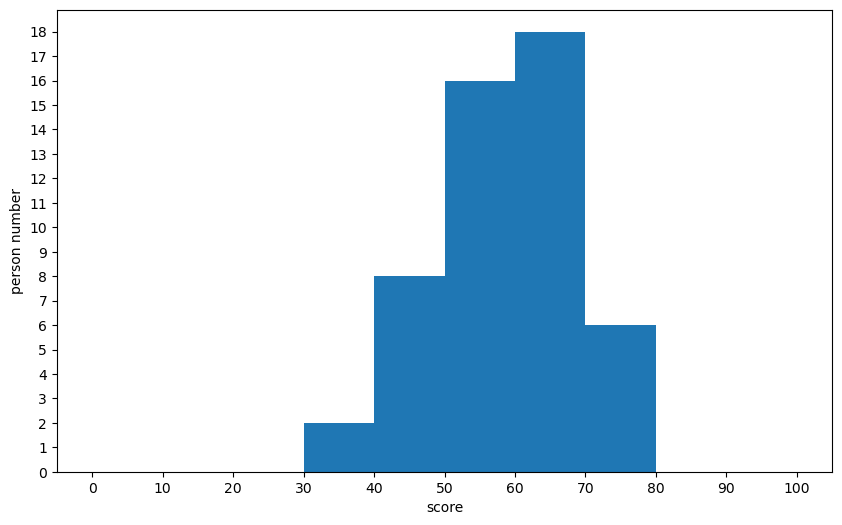

In [56]:
# 히스토그램 그리기
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1, 1, 1)

freq, _, _  = ax.hist(english_scores, bins=10, range=(0, 100))

ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

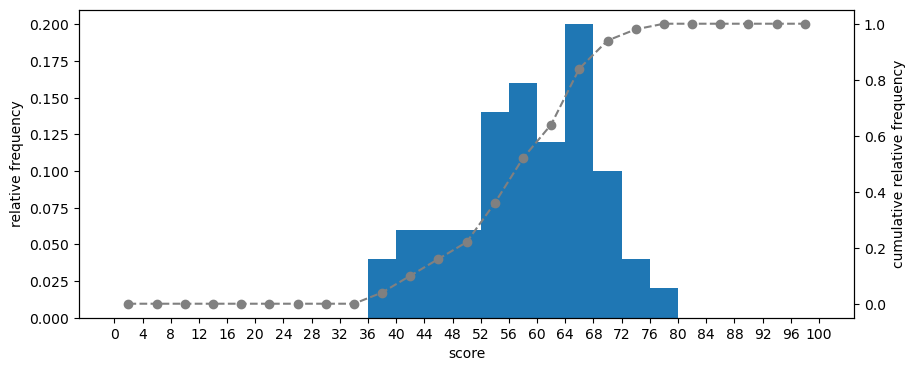

In [59]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color = 'gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

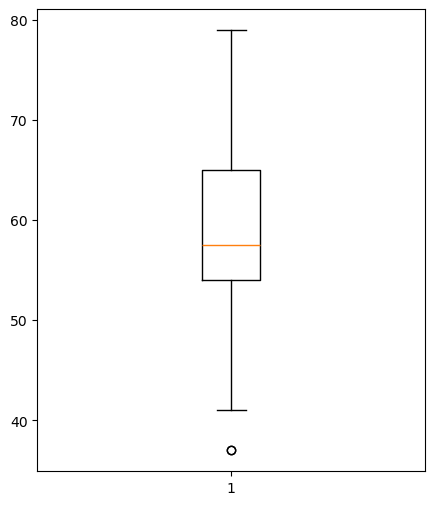

In [60]:
# box plot
fig = plt.figure(figsize=(5,6))
ax =fig.add_subplot(1, 1, 1)
ax.boxplot(english_scores, label=['english'])
plt.show()